# Function to remove corelated columns

In [ ]:
# Under EDA it's always essential to remove correlated columns, so if that can be done automatically then it'll be a huge help

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
df=pd.read_csv('population_by_country_2020.csv')
df

,Country (or dependency),Population (2020),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
0,China,1440297825,0.39 %,5540090,153,9388211,-348399.0,1.7,38,61 %,18.47 %
1,India,1382345085,0.99 %,13586631,464,2973190,-532687.0,2.2,28,35 %,17.70 %
2,United States,331341050,0.59 %,1937734,36,9147420,954806.0,1.8,38,83 %,4.25 %
3,Indonesia,274021604,1.07 %,2898047,151,1811570,-98955.0,2.3,30,56 %,3.51 %
4,Pakistan,221612785,2.00 %,4327022,287,770880,-233379.0,3.6,23,35 %,2.83 %
...,...,...,...,...,...,...,...,...,...,...,...
230,Montserrat,4993,0.06 %,3,50,100,NaN,N.A.,N.A.,10 %,0.00 %
231,Falkland Islands,3497,3.05 %,103,0,12170,NaN,N.A.,N.A.,66 %,0.00 %
232,Niue,1628,0.68 %,11,6,260,NaN,N.A.,N.A.,46 %,0.00 %
233,Tokelau,1360,1.27 %,17,136,10,NaN,N.A.,N.A.,0 %,0.00 %


In [4]:
g=df.corr()
g

,Population (2020),Net Change,Density (P/Km²),Land Area (Km²),Migrants (net)
Population (2020),1.000000,0.852329,-0.025433,0.455486,-0.267233
Net Change,0.852329,1.000000,-0.033803,0.305668,-0.302188
Density (P/Km²),-0.025433,-0.033803,1.000000,-0.058766,0.000155
Land Area (Km²),0.455486,0.305668,-0.058766,1.000000,0.225414
Migrants (net),-0.267233,-0.302188,0.000155,0.225414,1.000000


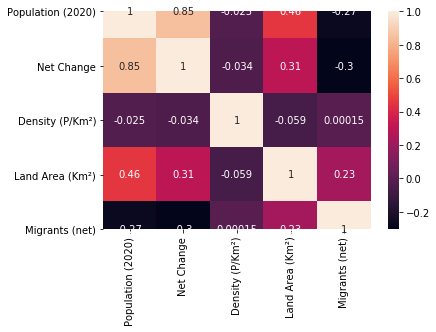

In [5]:
sns.heatmap(g, annot=True)

In [6]:
def remove_corr(df):
    
    g=df.corr()
    a=[]
    b=[]
    for i in g:
        for j in g.loc[i]:
            if ((1>j>0.75) or (-1<j<-0.75)) and (j not in b):
                a.append(i)
                b.append(j)
    
    
    df=df.drop(a,axis=1)
    print('New Dataframe')
    return df

In [7]:
remove_corr(df)

New Dataframe


,Country (or dependency),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
0,China,0.39 %,5540090,153,9388211,-348399.0,1.7,38,61 %,18.47 %
1,India,0.99 %,13586631,464,2973190,-532687.0,2.2,28,35 %,17.70 %
2,United States,0.59 %,1937734,36,9147420,954806.0,1.8,38,83 %,4.25 %
3,Indonesia,1.07 %,2898047,151,1811570,-98955.0,2.3,30,56 %,3.51 %
4,Pakistan,2.00 %,4327022,287,770880,-233379.0,3.6,23,35 %,2.83 %
...,...,...,...,...,...,...,...,...,...,...
230,Montserrat,0.06 %,3,50,100,NaN,N.A.,N.A.,10 %,0.00 %
231,Falkland Islands,3.05 %,103,0,12170,NaN,N.A.,N.A.,66 %,0.00 %
232,Niue,0.68 %,11,6,260,NaN,N.A.,N.A.,46 %,0.00 %
233,Tokelau,1.27 %,17,136,10,NaN,N.A.,N.A.,0 %,0.00 %


In [13]:
df=pd.read_csv('avocado.csv')
df

,Region,Type,Small Bags,Large Bags,Total Bags,Total Volume,AveragePrice,Date
0,Atlanta,organic,89424.11,207.08,89631.19,190257.38,1.70,2018-03-25
1,Atlanta,conventional,102717.50,153.00,102870.50,202790.74,1.75,2018-03-18
2,Boston,organic,120465.39,18.83,120484.22,236822.98,1.58,2018-03-11
3,Boston,conventional,136877.43,60.60,136938.03,239135.67,1.57,2018-03-04
4,California,organic,66273.89,46.58,66320.47,179041.72,1.82,2018-02-25
5,California,conventional,103033.73,186.20,106984.89,1203274.11,1.01,2018-03-25
6,NewYork,organic,119694.95,92.29,124214.59,777300.99,1.38,2018-03-18
7,NewYork,conventional,193813.92,196.57,197281.89,904333.98,1.29,2018-03-11
8,SanFrancisco,organic,231913.11,1286.43,236417.93,1051308.50,1.16,2018-03-04
9,SanFrancisco,conventional,162913.33,609.20,166836.16,984000.13,1.17,2018-02-25


In [15]:
remove_corr(df)

New Dataframe


,Region,Type,Total Bags,AveragePrice,Date
0,Atlanta,organic,89631.19,1.70,2018-03-25
1,Atlanta,conventional,102870.50,1.75,2018-03-18
2,Boston,organic,120484.22,1.58,2018-03-11
3,Boston,conventional,136938.03,1.57,2018-03-04
4,California,organic,66320.47,1.82,2018-02-25
5,California,conventional,106984.89,1.01,2018-03-25
6,NewYork,organic,124214.59,1.38,2018-03-18
7,NewYork,conventional,197281.89,1.29,2018-03-11
8,SanFrancisco,organic,236417.93,1.16,2018-03-04
9,SanFrancisco,conventional,166836.16,1.17,2018-02-25
